## Final Project Submission

Please fill out:
* Student name: Hazel Donaldson
* Student pace:  part time
* Scheduled project review date/time: June 17th, 2019
* Instructor name: Victor Geislinger
* Blog post URL:


## King County Housing Data
This dataset contains information about housing in King County from between May 2014 and May 2015. The goal of the this project is to create a house price predictive model using multiple linear regression with avaiable features in the dataset using good data science. I will be attempting to answer some of the following questions with this model: Is it worth investing in King County real estate? What zipcodes have the highest price increase overtime? 

Using the OSEMiN  method, the first step is to obtain the dataset.

# Obtain

In [40]:
#importing the relevant libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [41]:
#loading and obtaining the dataset
housing = pd.read_csv('kc_house_data.csv')
housing.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [42]:
housing.shape

(21597, 21)

At first glance, we can see that the dataset has 21597 rows and 21 columns. I can see that waterfront column has an NaN value and zero values. The view column also seems to have a lot of zero values. The yr_renovated column also has a lot of zero values and an NaN value. Will need to take a closer look at those columns. I will do this by looking at the .info().

In [43]:
housing.info() #checking the data types and number of enteries in the columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


In [44]:
housing.isna().any()

id               False
date             False
price            False
bedrooms         False
bathrooms        False
sqft_living      False
sqft_lot         False
floors           False
waterfront        True
view              True
condition        False
grade            False
sqft_above       False
sqft_basement    False
yr_built         False
yr_renovated      True
zipcode          False
lat              False
long             False
sqft_living15    False
sqft_lot15       False
dtype: bool

Looking at the datatypes and number of enteries for each of the columns. I can see that the waterfront, yr_renovated and view columns are missing some enteries. For some reason the sqrt_basement column is a object datatype when the other sqrt columns are integers. It's possible some of the data are strings instead of integers. The next step is to start to clean the data.

The first step for me is to get a closer look at the sqft_basement column.

# Data Cleaning

Looking at the unique values in the sqft_basement, I can see that there is a "?" inside which might be a mistake. I think it would be best to replace it or drop it

Initially, I thought that the '?' value was a mistake but it looks as if there are 454 values that equal the question mark. So it seems to be a placeholder when the actual value was unknown. I think it would be best to remove the placeholder

In [ ]:
housing.describe()

Getting a closer look at the 5 point statistics in the .describe(), there are some interesting things going on. First there seems to be incorrect entry with the max value of 33 bedrooms in the bedrooms columns. It looks like the waterfront column is categorical or boolean because the values range from 0 to 1. The view column seems to go from 0 to 4 when the data dictionary says the values refers to if the house has been viewed. The yr_renovated column needs a lot of work. Now, I will tackle the waterfront column.

In [ ]:
housing.waterfront.value_counts()

In [ ]:
waterfront_housing = housing.loc[housing.waterfront == 1]

In [ ]:
no_waterfront_housing = housing.loc[housing.waterfront == 0]

In [ ]:
waterfront_housing.describe()

In [ ]:
no_waterfront_housing.describe()

In [ ]:
#joining the houses with waterfront views with the houses that do not have waterfront views
housing = pd.concat([waterfront_housing, no_waterfront_housing])
housing.head()

In [ ]:
housing.info() #checking the number of enteries for the waterfront column

Now that the waterfront column has been dealt with. It's time to work on the yr_renovated column.

In [ ]:
housing.yr_renovated.unique()

In [ ]:
housing.yr_renovated.isna().sum()/housing.shape[0], housing.yr_renovated.isna().sum()

In [ ]:
len(housing.loc[housing.yr_renovated == 0]) #are these homes that haven't been renovated? could be interesting to investors 
#looking to flip a home

In [ ]:
housing = housing.dropna()

In [ ]:
housing.isna().sum()

To recap, in the cleaning process I was removed the null values for the waterfront column by separating the dataset into houses that do not have a waterfront view and houses that do have a waterfront view, which removed any null value. Then put the dataset back together. Then I dropped the null values in the view and yr_renovated columns using .dropna().

# Exploring Data

Now that the dataset has been clean, I can begin to explore the data a bit more. First, I will check the distribution of the data using Pandas's .hist() function.

In [ ]:
housing.hist(figsize = (20,18));

Now, I will create KDE plots of the continuous variables.

In [ ]:
for column in ['bathrooms', 'bedrooms', 'condition', 'floors', 'grade', 'price', 'sqft_above', 'sqft_living','sqft_living15'
              'waterfront', 'sqft_lot']:
    housing[column].plot.hist(normed = True)
    housing[column].plot.kde(label=column)
    plt.legend()
    plt.show()


Now, I will create joinplots using seaborn between the target variables and its possible predictors. 

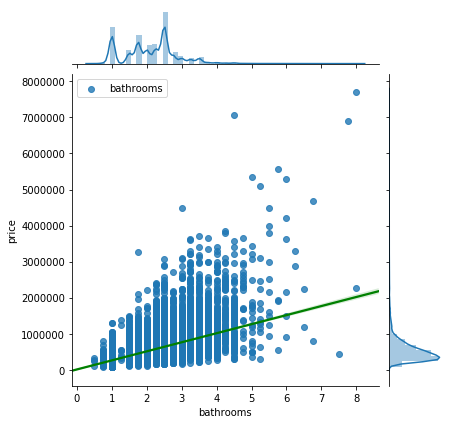

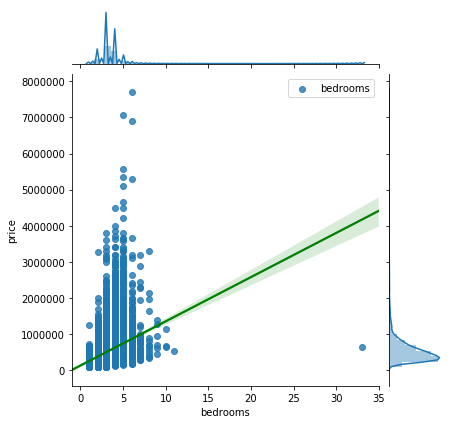

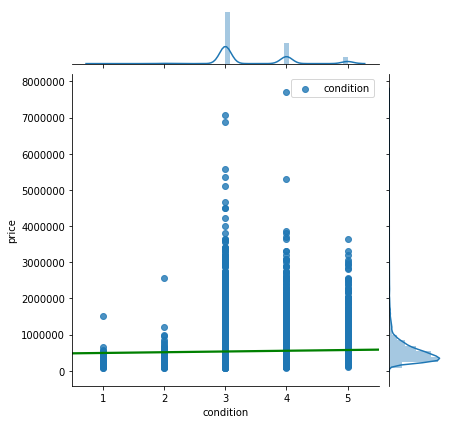

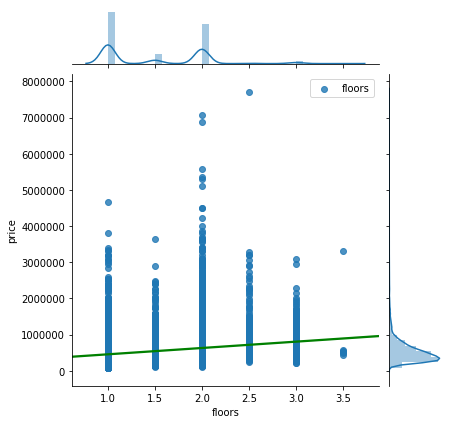

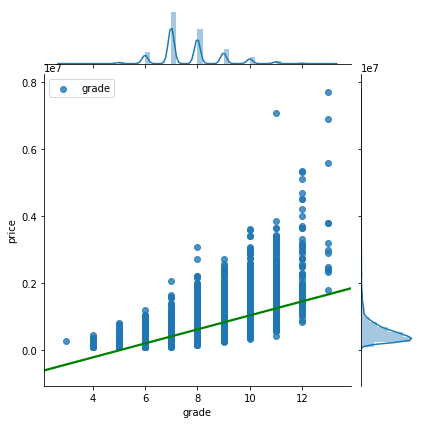

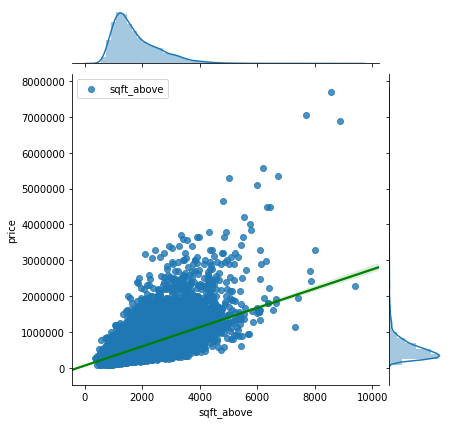

ValueError: Could not interpret input 'sqft_livingsqft_living15'

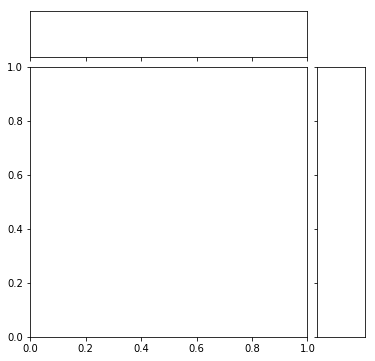

In [48]:
for column in ['bathrooms', 'bedrooms', 'condition',
       'floors', 'grade', 'sqft_above', 'sqft_living'
              'sqft_living15']:
    sns.jointplot(x=column, y="price",
                  data=housing, 
                  kind='reg', 
                  label=column,
                  joint_kws={'line_kws':{'color':'green'}})
#     sns.regplot(walmart[column], walmart.Weekly_Sales, label=column)
    plt.legend()
    plt.show()